<a href="https://colab.research.google.com/github/bengy124/Drug-Discovery-ML/blob/main/Drug_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection and Pre-processing

In [1]:
#Installing chembl web resource
! pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.9-py3-none-any.whl (55 kB)
ERROR: Could not find a version that satisfies the requirement requests-cache~=1.2 (from chembl_webresource_client) (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.2.0, 0.2.1, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.4.10, 0.4.11, 0.4.12, 0.4.13, 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 1.0.0a0, 1.0.0a1, 1.0.0a2, 1.0.0b0, 1.0.0b1, 1.0.0, 1.0.1, 1.1.0, 1.1.1)
ERROR: No matching distribution found for requests-cache~=1.2 (from chembl_webresource_client)


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


To begin, you search for a "target" being either a target protein or organism that the drug/molecule will act on, we want to see the modulatory effect the drug compound will have on the target whether it activates or inhibits the protein/organism. For this example, I used Aromatase which is an enzyme part of the cytochrome P450 which is linked with breast cancer tissue formation. After selecting a target, it will search and gather data from Chembl and filter for Inhibitory Concentration at 50% (IC50), meaning the drug will elicit a 50% inhibition of the target protein, and output a dataset. The data also features the Standard Value of a molecule which quantifies the potency. The lower the value the better as it refers to the concentration of the drug a person must consume in order to elicit the IC50.



In [3]:
#Searching of target
target = new_client.target
target_query = target.search('Beta amyloid A4 protein') #target input
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,5.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Mus musculus,Amyloid-beta A4 protein,5.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090


In [4]:
#Selection of target
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2487'

In [5]:
#Creating filtered df for IC50 of selected target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')
df=pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890291,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.777
1563,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890292,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,31.76
1564,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890293,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.9539999999999997
1565,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890294,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,15.04


In [6]:
#Coverting df to csv
df.to_csv('bioactivity_data.csv',index=False)

In [7]:
!head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiting Gamma-secretase proteolytic pathway in HEK293 cell stably transfected with a double mutant form of human APP(K595N/M596L),B,,,BAO_0000190,BAO_0000219,cell-based format,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,,,CHEMBL1133739,J Med Chem

In [8]:
#Filtering to remove NaN values
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890291,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.777
1563,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890292,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,31.76
1564,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890293,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.9539999999999997
1565,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890294,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,15.04


In [9]:
#Removing duplicates
df = df.drop_duplicates(['canonical_smiles'])
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890291,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,0.777
1563,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890292,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,31.76
1564,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890293,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.9539999999999997
1565,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24890294,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5158285,Inhibition of amyloid beta (1 to 42 ) (unknown...,B,None,None,BAO_0000190,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,15.04


In [10]:
#Creating new df with selected rows
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df = df[selection]
df


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1562,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,777.0
1563,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,31760.0
1564,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,2954.0
1565,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,15040.0


In [11]:
#Output to csv
df.to_csv('new_bioacivity_preprocessed.csv', index = False)

The dataset then goes through pre-processing in which labels are assigned to the molecules to show their bioactivity. Molecules with a Standard Value less than 1000 nM will be labelled active, if greater than 10,000 then labelled as inactive and in between 1000 and 10,000 will be labelled as intermediate. After, it creates a new dataset containing only the Molecule ID, Standard Value, Bioactivity, and Canonical Smiles which is a notation that represents the chemical structure of the molecule.

In [12]:
df = pd.read_csv('new_bioacivity_preprocessed.csv')

In [13]:
#Function to assign class identification of either active, inactive, or intermediate based on standard_value
bioactivity_class = []
for i in df.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [14]:
#New df with bioactivity_class included
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df=pd.concat([df,pd.Series(bioactivity_class)], axis=1)
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1156,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,777.0,active
1157,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,31760.0,inactive
1158,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,2954.0,intermediate
1159,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,15040.0,inactive


In [15]:
#Output to csv
df.to_csv('bioactivity_data.csv', index=False)

In [16]:
! ls -l

total 546124
-rw-r--r-- 1 root root   100562 Apr  1 09:06 bioactivity_data.csv
-rw-r--r-- 1 root root   166302 Apr  1 07:32 bioactivity_data_pIC50_1.csv
-rw-r--r-- 1 root root   123371 Apr  1 07:33 bioactivity_data_pIC50_2.csv
-rw-r--r-- 1 root root  2079771 Apr  1 07:40 bioactivity_data_pIC50.csv
-rw-r--r-- 1 root root  2075253 Apr  1 07:40 descriptors_output.csv
-rw-r--r-- 1 root root    19255 Apr  1 08:51 Experimental_vs_Predicted_pIC50.pdf
drwxr-xr-x 3 root root     4096 Apr  1 07:34 __MACOSX
-rw-r--r-- 1 root root      122 Apr  1 07:33 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      122 Apr  1 07:33 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      133 Apr  1 07:33 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      129 Apr  1 07:33 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      127 Apr  1 07:33 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2

### EDA

In [17]:
#Installing conda and rdkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-04-01 09:06:48--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.5’

Miniconda3-py37_4.8 100%[===================>]  81.12M   153MB/s    in 0.5s    

2024-04-01 09:06:48 (153 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.5’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_10

With the pre-processed dataset it can begin the Exploratory Data Analysis (EDA) in which it will calculate Lipinski descriptors for each molecule. These descriptors were created by Christopher Lipinski, who was a scientist at Pfizer that came up with rules for the assessment of drug-likeness based on the pharmacokinetic profile of absorption, distribution, metabolism, and excretion (ADME). He created a set of rules that can help predict how successful an oral drug can be based on the following: a Molecular Weight less than 500 Daltons, an Octanol-water partition coefficient aka LogP (refers to solubility) less than 5, no more than 5 hydrogen bond donors, and no more than 10 hydrogen bond acceptors. For a drug to be orally bioavailable it can not break more than one of these rules.


In [18]:
df = pd.read_csv('bioactivity_data.csv')

In [19]:
#Removing canonical_smiles
df_nosmiles = df.drop(columns='canonical_smiles')

#Empty list to store longest compound from each canonical_smiles
smiles = []

#Loop to split canonical_smile into compunds and then append the longest compound from split compounds
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd,key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')



In [20]:
#New df with updated canonical_smiles
df_cleaned_smiles = pd.concat([df_nosmiles,smiles],axis=1)
df_cleaned_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL311039,5000.0,intermediate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
1156,CHEMBL5174252,777.0,active,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...
1157,CHEMBL5205489,31760.0,inactive,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...
1158,CHEMBL5190530,2954.0,intermediate,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3
1159,CHEMBL5199187,15040.0,inactive,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3


In [21]:
import numpy as np
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [22]:
#Function to calculate lipinski descriptors
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #Converting each smiles string into a molecule using rdkit
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        #Calculating descriptors for each molecule
        desc_MolWt = Descriptors.MolWt(mol) #Molecular weight
        desc_MolLogP = Descriptors.MolLogP(mol) #LogP
        desc_NumHDonors = Lipinski.NumHDonors(mol) #Number of H donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) #Number of HG acceptors

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    #Defining column names
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    #New df with calculated descriptors
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [23]:
#Lipinski function applied to df_cleaned_smiles.canonical_smiles to calculate descriptors
df_lipinski=lipinski(df_cleaned_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1156,360.377,4.03670,2.0,6.0
1157,360.377,3.33790,1.0,7.0
1158,256.349,2.82622,2.0,3.0
1159,325.456,3.16612,1.0,4.0


In [24]:
#Adding lipinski descriptors
df=pd.concat([df,df_lipinski],axis=1)
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1156,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,777.0,active,360.377,4.03670,2.0,6.0
1157,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,31760.0,inactive,360.377,3.33790,1.0,7.0
1158,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,2954.0,intermediate,256.349,2.82622,2.0,3.0
1159,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,15040.0,inactive,325.456,3.16612,1.0,4.0


In [25]:
#Function to normalize standard_value
def norm_value(input):
    norm = []

    #Loop to set a value to 100000000 if it is greater than 100000000
    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    #Add standard_value_norm as new column and drop standard_value
    input['standard_value_norm'] = norm
    x = input.drop('standard_value',1)

    return x

In [26]:
#Function to calculte pIC50 values
def pIC50(input):
    pIC50 = []
    #Loop to convert standard_value_norm from nM to M by multiplying by 10^-9
    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    #Add calculated pIC50 values as new column and drop standard_value_norm
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x


In [27]:
df.standard_value.describe()

count      1161.00000
mean      20966.89733
std       55293.39395
min          -1.00000
25%         160.00000
50%        3960.00000
75%       17330.00000
max      800000.00000
Name: standard_value, dtype: float64

In [28]:
#Creating new df using transformation functions
df_norm=norm_value(df)
df_norm

<ipython-input-25-13b53751f2c4>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value',1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1156,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,777.0
1157,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,31760.0
1158,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,256.349,2.82622,2.0,3.0,2954.0
1159,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,325.456,3.16612,1.0,4.0,15040.0


In [29]:
df_norm.standard_value_norm.describe()

count      1161.00000
mean      20966.89733
std       55293.39395
min          -1.00000
25%         160.00000
50%        3960.00000
75%       17330.00000
max      800000.00000
Name: standard_value_norm, dtype: float64

In [30]:
df=pIC50(df_norm)
df

<ipython-input-26-8043521d976f>:7: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-26-8043521d976f>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1156,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,6.109579
1157,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,4.498120
1158,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,256.349,2.82622,2.0,3.0,5.529590
1159,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,325.456,3.16612,1.0,4.0,4.822752


In [31]:
df.pIC50.describe()

count    1160.000000
mean        5.771782
std         1.343414
min         3.096910
25%         4.760514
50%         5.401211
75%         6.776133
max         9.522879
Name: pIC50, dtype: float64

In [32]:
#Output to csv
df.to_csv('bioactivity_data_pIC50_1.csv')

In [33]:
#Filtering out rows containing intermediate bioactivity class and cleaning
df=df[df.bioactivity_class !='intermediate']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

<ipython-input-33-8c707876311b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-33-8c707876311b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1147,CHEMBL258632,COc1cc(/C=C/c2cc(/C=C/c3ccc(O)c(OC)c3)n(-c3ccc...,inactive,485.496,5.54970,2.0,8.0,4.821023
1151,CHEMBL5199487,O=C(CCN1CCN(Cc2ccccc2)CC1)Nc1n[nH]c2ncccc12,inactive,364.453,2.10430,2.0,5.0,4.877129
1156,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,6.109579
1157,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,4.498120


In [34]:
#Output to csv
df.to_csv('bioactivity_data_pIC50_2.csv')

After calculating and assigning the Lipinski descriptors to each molecule, the Standard Value/IC50 is converted to pIC50 by using a negative log transformation to achieve a more even distribution. A new dataset is created combining the bioactivity dataset with the Lipinski descriptors and changing the Standard Value to the new pIC50 values. Using this new dataset it can create; a Frequency plot of the active and inactive bioactivity classes, a scatter plot of Molecular Weight vs LogP and box plots comparing the bioactivity class against the Lipinski descriptors as well as pIC50. A statistical analysis using the Mann-Whitney U Test is also performed which tests for the statistical significance of the pIC50 variable and Lipinski descriptors by comparing the active and inactive classes.

In [35]:
#Creating figures to show bioactivy and lipinski descriptors
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


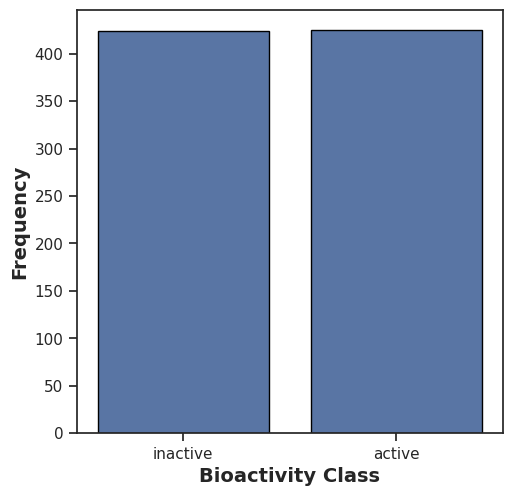

In [36]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


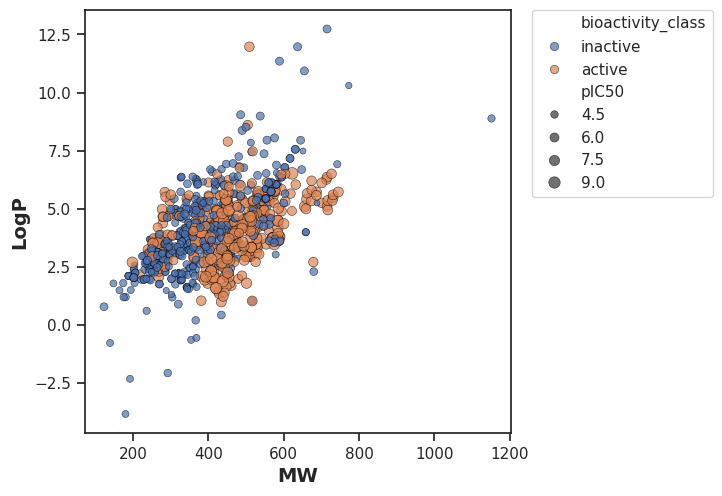

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

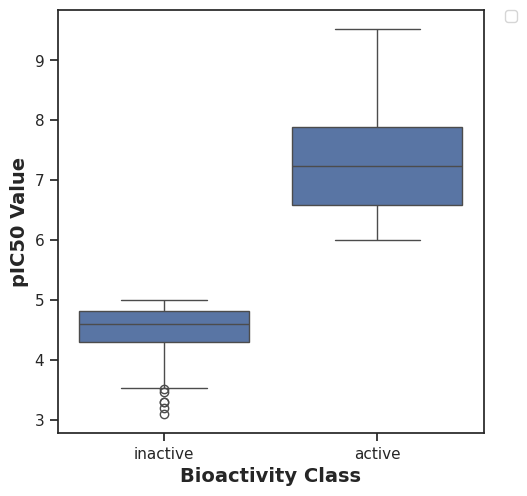

In [38]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='pIC50',data=df)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 Value', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_ic50.pdf')

In [39]:
#Function to conduct a Mann-Whitney U test for descriptors
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  #Set the seed for the random number generator
  seed(1)

  selection = [descriptor, 'bioactivity_class'] #Select the descriptor and bioactivity_class columns from df
  df_active = df[selection]
  active = df[df.bioactivity_class == 'active'] #Filter the DataFrame to keep only the rows where bioactivity_class is active
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df_inactive = df[selection]
  inactive = df[df.bioactivity_class == 'inactive'] #Filter the DataFrame to keep only the rows where bioactivity_class is inactive
  inactive = inactive[descriptor]

  #Conduct the Mann-Whitney U test
  stat, p = mannwhitneyu(active, inactive)

  #Set significance level
  alpha = 0.05
  #Results conditons
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  #Df with results
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [40]:
#Conducting Mann-Whitney U test and creating figures
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,180200.0,2.349041e-140,0.05,Different distribution (reject H0)


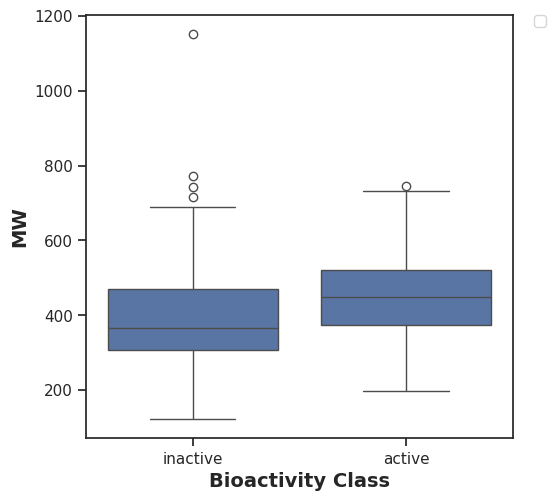

In [41]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='MW',data=df)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_MW.pdf')

In [42]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,115799.0,6.336705e-13,0.05,Different distribution (reject H0)


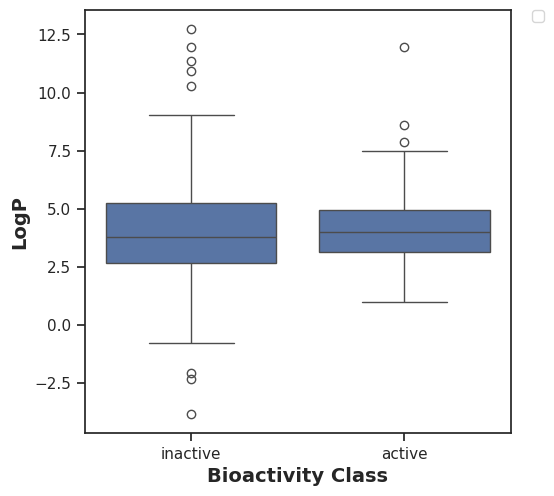

In [43]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='LogP',data=df)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_LogP.pdf')

In [44]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,95668.5,0.119118,0.05,Same distribution (fail to reject H0)


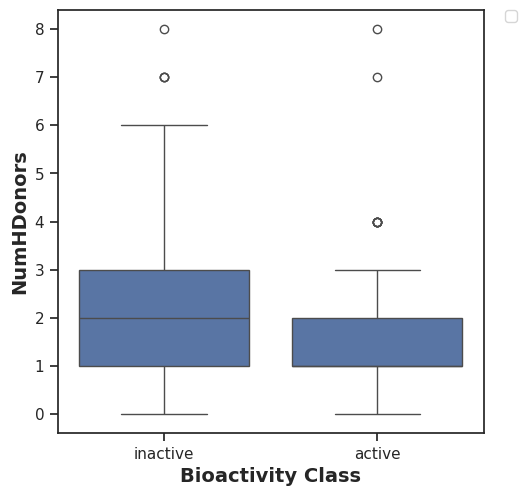

In [45]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHDonors',data=df)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHDonors.pdf')

In [46]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,71682.0,9.450220e-08,0.05,Different distribution (reject H0)


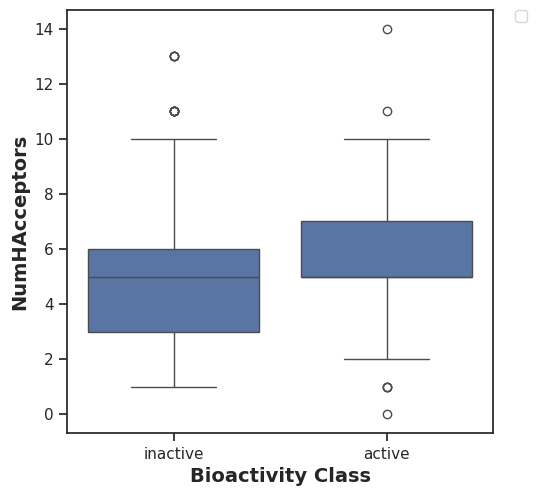

In [47]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHAcceptors',data=df)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHAcceptors.pdf')

In [48]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,114442.5,4.691561e-12,0.05,Different distribution (reject H0)


For this example, results from the Mann-Whitney U Test showed that the pIC50 had a statistically significant difference as the active and inactive bioactivity classes showed different distributions. For the Lipinski descriptors the MW, Hdonor and Hacceptor had statistically significant differences showing different distributions with the bioactivity classes. The LogP had no statistically significant difference as the distribution with the bioactivity classes were the same.


### Dataset Prep and Model Building

To prepare the data for running a regression model, it will use PaDEL to calculate the molecular descriptors of each molecule. PaDEL removes salts and small organic acids to purify the chemical structures, outputs the changes in canonical smile notation and assigns a PubChem fingerprint to each molecule. The PubChem fingerprint encodes molecular fragment information with 881 binary digits. This helps to describe the unique structural features of the molecules and allows the machine learning model to learn from the unique molecular properties of each fingerprint, and also be able to distinguish between compounds that are active and inactive. We want to observe which fingerprints are essential for creating a potent drug with minimal side effects. Lastly, to create the regression model using XGBoost Regressor, it will set the PubChem fingerprints as the X input and the pIC50 values as the Y output and tune the hyperparameters with optuna. Then, remove all the low variance values and split the data in an 80/20 ratio. Once running XGBoost Regressor, it will produce an r<sup>2</sup> value and will show a scatterplot of the experimental vs predicted pIC50 values to visualize the results.


In [49]:
#Installing PaDEL
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-04-01 09:07:55--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-04-01 09:07:55--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.5’

padel.zip.5         100%[===================>]  24.57M   104MB/s    in 0.2s    

2024-04-01 09:07:56 (104 MB/s) - ‘padel.zip.5’ saved [25768637/25768637]

--2024-04-01 09:07:56--  https://gi

In [50]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config 

In [51]:
#Selecting canonical_smiles and molecule_chembl_id columns and writing to molecule.smi
df=pd.read_csv('bioactivity_data_pIC50_1.csv')
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep = '\t', index = False, header = False)

In [52]:
! cat molecule.smi | head -5

! cat molecule.smi | wc -l

CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1	CHEMBL311039
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1	CHEMBL450926
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1	CHEMBL310242
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1	CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1	CHEMBL75183
1161


In [53]:
#Running PaDEL
! bash padel.sh

Processing CHEMBL311039 in molecule.smi (1/1161). 
Processing CHEMBL450926 in molecule.smi (2/1161). 
Processing CHEMBL74874 in molecule.smi (4/1161). Average speed: 2.29 s/mol.
Processing CHEMBL310242 in molecule.smi (3/1161). Average speed: 4.15 s/mol.
Processing CHEMBL75183 in molecule.smi (5/1161). Average speed: 1.82 s/mol.
Processing CHEMBL563 in molecule.smi (6/1161). Average speed: 1.42 s/mol.
Processing CHEMBL196279 in molecule.smi (7/1161). Average speed: 1.31 s/mol.
Processing CHEMBL195970 in molecule.smi (8/1161). Average speed: 1.10 s/mol.
Processing CHEMBL193971 in molecule.smi (10/1161). Average speed: 0.98 s/mol.
Processing CHEMBL264006 in molecule.smi (9/1161). Average speed: 1.09 s/mol.
Processing CHEMBL194274 in molecule.smi (11/1161). Average speed: 0.95 s/mol.
Processing CHEMBL196321 in molecule.smi (12/1161). Average speed: 0.90 s/mol.
Processing CHEMBL196322 in molecule.smi (13/1161). Average speed: 0.85 s/mol.
Processing CHEMBL380778 in molecule.smi (14/1161). A

In [54]:
#Droping Name column
df_X = pd.read_csv('descriptors_output.csv')
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1157,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1158,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1159,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_Y = df['pIC50']
df_Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1156    6.109579
1157    4.498120
1158    5.529590
1159    4.822752
1160    5.885056
Name: pIC50, Length: 1161, dtype: float64

In [56]:
#New df with selections
dataset = pd.concat([df_X,df_Y], axis=1)
# Cleaning
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.109579
1157,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.498120
1158,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.529590
1159,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.822752


In [57]:
#Output to csv
dataset.to_csv('bioactivity_data_pIC50.csv')

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
#Splitting Pubchem ID and pIC50 value
X = dataset.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1157,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1158,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1159,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
Y = dataset.pIC50
Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1156    6.109579
1157    4.498120
1158    5.529590
1159    4.822752
1160    5.885056
Name: pIC50, Length: 1160, dtype: float64

In [61]:
X.shape

(1160, 881)

In [73]:
#Removing features based on selected variance threshold
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection.fit_transform(X)
X.shape

(1160, 178)

In [63]:
# Splitting data
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [64]:
X_train.shape, y_train.shape

((928, 178), (928,))

In [65]:
X_val.shape, y_val.shape

((116, 178), (116,))

In [66]:
X_test.shape, y_test.shape

((116, 178), (116,))

In [67]:
!pip install xgboost
!pip install optuna

import xgboost as xgb
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

In [92]:
#Hyperparameter tuning via Optuna
def objective(trial):
      params = {
        'n_estimators': trial.suggest_int('n_estimators',50, 400, step=50),  # Number of sub-trees to train
        'max_depth': trial.suggest_int('max_depth',2, 40),  # Maximum tree depth
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 1.00, step=0.05),  # Learning rate
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 100, log=True),  # L1 regularization rate
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 100, log=True),  # L2 regularization rate
        'gamma': trial.suggest_float('gamma', 0.0, 5.0, step=0.1),  # Complexity control
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum child weight
        'objective': 'reg:squarederror',
        'seed': trial.suggest_categorical('seed', [42])
    }

      clf = xgb.XGBRegressor(**params)
      score = cross_val_score(clf, X_train, y_train, scoring='r2', cv=15).mean()
      return score

In [93]:
# Create a study object
study = optuna.create_study(direction='maximize')

# Optimize the study
study.optimize(objective, n_trials=300)

# Print the best parameters found
print("Best parameters found: ", study.best_params)

[I 2024-04-01 10:30:51,884] A new study created in memory with name: no-name-b34cf333-9bab-452d-9e74-ba97dd01c5c6
[I 2024-04-01 10:30:53,079] Trial 0 finished with value: 0.6398386589673829 and parameters: {'n_estimators': 200, 'max_depth': 37, 'learning_rate': 0.7000000000000001, 'reg_alpha': 0.05304844242760946, 'reg_lambda': 0.000185468839915701, 'gamma': 2.6, 'min_child_weight': 5, 'seed': 42}. Best is trial 0 with value: 0.6398386589673829.
[I 2024-04-01 10:30:53,737] Trial 1 finished with value: 0.6476715756731504 and parameters: {'n_estimators': 50, 'max_depth': 35, 'learning_rate': 0.25, 'reg_alpha': 0.13984715349582533, 'reg_lambda': 0.023108797705785982, 'gamma': 3.0, 'min_child_weight': 6, 'seed': 42}. Best is trial 1 with value: 0.6476715756731504.
[I 2024-04-01 10:30:56,416] Trial 2 finished with value: 0.6773404615201187 and parameters: {'n_estimators': 400, 'max_depth': 40, 'learning_rate': 0.1, 'reg_alpha': 0.4259441641956127, 'reg_lambda': 0.00039021777551056066, 'gamm

Best parameters found:  {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'reg_alpha': 0.018425660023352188, 'reg_lambda': 54.78491211387485, 'gamma': 0.0, 'min_child_weight': 10, 'seed': 42}


In [94]:
# Best parameters
best_params = study.best_params

# Initialize a new XGBoost regressor with the best parameters
best_xgbr = xgb.XGBRegressor(**best_params)

# Fit the best model to the full training data
best_xgbr.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, eval_metric='rmse')

# Evaluate the model on the test data
y_pred = best_xgbr.predict(X_test)

[0]	validation_0-rmse:1.28588
[1]	validation_0-rmse:1.22699
[2]	validation_0-rmse:1.17757
[3]	validation_0-rmse:1.13947
[4]	validation_0-rmse:1.10701
[5]	validation_0-rmse:1.07845
[6]	validation_0-rmse:1.05547
[7]	validation_0-rmse:1.03676
[8]	validation_0-rmse:1.02164
[9]	validation_0-rmse:1.00704
[10]	validation_0-rmse:0.99465
[11]	validation_0-rmse:0.98216
[12]	validation_0-rmse:0.97255
[13]	validation_0-rmse:0.96202
[14]	validation_0-rmse:0.95370
[15]	validation_0-rmse:0.94289


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.93664
[17]	validation_0-rmse:0.93061
[18]	validation_0-rmse:0.92447
[19]	validation_0-rmse:0.91834
[20]	validation_0-rmse:0.91098
[21]	validation_0-rmse:0.90681
[22]	validation_0-rmse:0.90331
[23]	validation_0-rmse:0.90142
[24]	validation_0-rmse:0.89810
[25]	validation_0-rmse:0.89492
[26]	validation_0-rmse:0.89451
[27]	validation_0-rmse:0.89338
[28]	validation_0-rmse:0.88863
[29]	validation_0-rmse:0.88803
[30]	validation_0-rmse:0.88677
[31]	validation_0-rmse:0.88547
[32]	validation_0-rmse:0.88531
[33]	validation_0-rmse:0.88402
[34]	validation_0-rmse:0.88225
[35]	validation_0-rmse:0.88137
[36]	validation_0-rmse:0.88201
[37]	validation_0-rmse:0.88082
[38]	validation_0-rmse:0.87680
[39]	validation_0-rmse:0.87454
[40]	validation_0-rmse:0.87215
[41]	validation_0-rmse:0.87180
[42]	validation_0-rmse:0.86987
[43]	validation_0-rmse:0.86934
[44]	validation_0-rmse:0.86697
[45]	validation_0-rmse:0.86668
[46]	validation_0-rmse:0.86615
[47]	validation_0-rmse:0.86388
[48]	val

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared scores
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Absolute Error (MAE): 0.4385994830232619
Mean Squared Error (MSE): 0.3870054963441762
Root Mean Squared Error (RMSE): 0.622097658205025
R-squared score: 0.7526643339208869


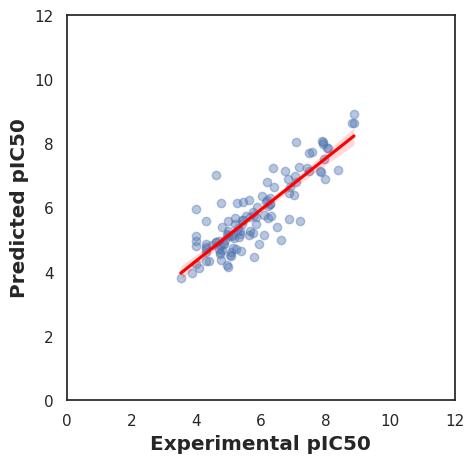

In [96]:
#Ploting results of experimental pIC50 vs predicited pIC50
sns.set (color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show
plt.savefig('Experimental_vs_Predicted_pIC50.pdf')